In [1]:
!pip install torch_geometric

#  Graph  Construction

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()

# add nodes
num_nodes = 20  # 원하는 노드 수
for i in range(num_nodes):
    G.add_node(f"{i}")

# add edges (connect randomly)
num_edges = 30  # 원하는 엣지 수
for _ in range(num_edges):
    source = random.choice(list(G.nodes()))
    target = random.choice(list(G.nodes()))
    if source != target and not G.has_edge(source, target):
        G.add_edge(source, target)



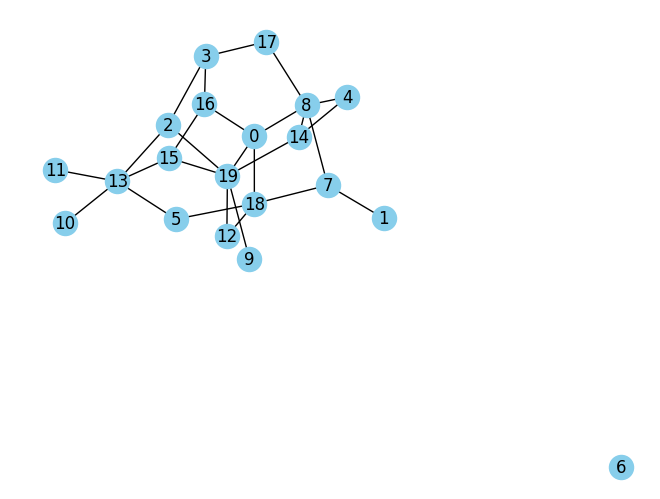

In [3]:
# visualization
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue")
plt.show()

# Random Walk

In [4]:
def random_walk(graph, start_node, num_steps):
    result = []
    current_node = start_node
    for _ in range(num_steps):
        result.append(current_node)
        neighbors = list(graph .neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)

    return result

In [5]:
start_node = random.choice(list(G.nodes()))
num_steps = 10  # the number of steps for random walk (length of sequence)

print("Random Walk:")

result = random_walk(G, start_node, num_steps)
print(result)

Random Walk:
['13', '5', '18', '0', '16', '3', '16', '15', '13', '11']


# Deep Walk Code

In [6]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

__building dataset__

In [23]:
dataset = [random_walk(G, start_node=random.choice(list(G.nodes)), num_steps=20) for _ in range(100)]

In [24]:
for seq in dataset:
    print(seq)

['13', '2', '19', '12', '19', '0', '19', '12', '19', '2', '3', '16', '3', '2', '13', '10', '13', '5', '13', '10']
['4', '14', '19', '14', '8', '7', '8', '14', '8', '4', '8', '14', '8', '7', '8', '14', '19', '14', '8', '14']
['7', '18', '7', '1', '7', '8', '17', '8', '4', '8', '17', '3', '2', '3', '16', '3', '17', '3', '17', '8']
['12', '18', '12', '19', '2', '13', '15', '16', '3', '17', '3', '17', '3', '16', '0', '16', '15', '16', '15', '16']
['2', '3', '17', '8', '7', '8', '14', '19', '15', '16', '15', '16', '15', '13', '15', '16', '3', '16', '3', '17']
['16', '3', '16', '15', '13', '2', '19', '14', '4', '14', '8', '4', '8', '4', '14', '19', '12', '18', '7', '1']
['9', '19', '15', '19', '14', '8', '17', '3', '16', '3', '2', '3', '2', '13', '11', '13', '15', '13', '15', '16']
['12', '18', '0', '18', '0', '18', '7', '1', '7', '18', '0', '8', '17', '3', '16', '15', '16', '0', '8', '17']
['4', '14', '19', '15', '13', '2', '3', '16', '0', '8', '4', '14', '8', '14', '19', '9', '19', '0', '1

__running deepwalk__

In [25]:
deepwalk = Word2Vec(dataset, vector_size=300, sg=1, epochs=100)

In [43]:
sorted(deepwalk.wv.index_to_key)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '7',
 '8',
 '9']

In [29]:
print(deepwalk.wv["1"])
print(deepwalk.wv["1"].shape)

[ 1.05922833e-01  4.99823801e-02 -1.04767144e-01  4.89053950e-02
  5.63759506e-02 -1.17875189e-01  3.05310115e-02  5.07363379e-02
 -5.01658991e-02 -2.69973837e-02  1.68409422e-01 -4.70800847e-02
 -1.17543541e-01  1.56561717e-01 -7.76975974e-02 -4.46267612e-02
  1.12990402e-01 -1.13552555e-01 -4.37724292e-02 -3.44837271e-02
  3.91253568e-02  1.44893471e-02  1.52742252e-01  3.06421146e-02
 -3.85021884e-03 -1.52664706e-01 -1.58738196e-01 -8.46198946e-03
 -7.15439469e-02 -1.23585999e-01  1.09343395e-01 -1.22251332e-01
  7.08784610e-02 -6.64917082e-02 -9.64598060e-02  5.79697788e-02
 -7.55728781e-02  1.63106650e-01  2.67721359e-02 -3.34870704e-02
 -4.46344018e-02 -5.65526225e-02 -4.07580063e-02 -6.26440272e-02
  2.53245831e-02  6.79993331e-02 -1.08582847e-01  2.45580431e-02
 -4.49308641e-02  1.70611784e-01 -6.19608127e-02  1.18919099e-02
 -6.92883134e-02  9.87001657e-02  1.52712699e-03 -7.37144127e-02
  1.20809235e-01 -1.10194430e-01 -6.54852856e-03 -1.42107317e-02
 -4.90928106e-02 -7.14987

# Node2Vec Code

__Random Walk Code for Node2Vec__

In [30]:
def node2vec_walk(G, start_node, num_steps, p, q):
    walk = [start_node]

    for _ in range(num_steps - 1):
        current_node = walk[-1]
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            walk.append(next_node)
        else:
            break

    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    for neighbor in neighbors:
        if neighbor == previous_node:
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            unnormalized_weights.append(1.0)
        else:
            unnormalized_weights.append(1.0 / q)

    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    return random.choices(neighbors, weights=norm_weights)[0]

In [31]:
dataset2 = [node2vec_walk(G, start_node=random.choice(list(G.nodes)), num_steps=10, p=0.8, q=0.2) for _ in range(100)]

In [32]:
for i in dataset:
    print(i)

['13', '2', '19', '12', '19', '0', '19', '12', '19', '2', '3', '16', '3', '2', '13', '10', '13', '5', '13', '10']
['4', '14', '19', '14', '8', '7', '8', '14', '8', '4', '8', '14', '8', '7', '8', '14', '19', '14', '8', '14']
['7', '18', '7', '1', '7', '8', '17', '8', '4', '8', '17', '3', '2', '3', '16', '3', '17', '3', '17', '8']
['12', '18', '12', '19', '2', '13', '15', '16', '3', '17', '3', '17', '3', '16', '0', '16', '15', '16', '15', '16']
['2', '3', '17', '8', '7', '8', '14', '19', '15', '16', '15', '16', '15', '13', '15', '16', '3', '16', '3', '17']
['16', '3', '16', '15', '13', '2', '19', '14', '4', '14', '8', '4', '8', '4', '14', '19', '12', '18', '7', '1']
['9', '19', '15', '19', '14', '8', '17', '3', '16', '3', '2', '3', '2', '13', '11', '13', '15', '13', '15', '16']
['12', '18', '0', '18', '0', '18', '7', '1', '7', '18', '0', '8', '17', '3', '16', '15', '16', '0', '8', '17']
['4', '14', '19', '15', '13', '2', '3', '16', '0', '8', '4', '14', '8', '14', '19', '9', '19', '0', '1

In [33]:
node2vec = Word2Vec(dataset2, vector_size=200, sg=1, epochs=100)

In [35]:
sorted(node2vec.wv.index_to_key)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '7',
 '8',
 '9']

In [34]:
print(node2vec.wv["1"])
print(node2vec.wv["1"].shape)

[ 0.06028121 -0.04644332 -0.04730978  0.08414894  0.04604344  0.06138076
  0.18774834  0.17524943 -0.07972509  0.00408098  0.04798624 -0.14661765
  0.08479633  0.14727806 -0.11309911  0.04676064  0.07504801  0.06425764
  0.01467209 -0.30768695  0.19558927  0.01772709  0.24994636  0.06932653
  0.00487757  0.01027927 -0.04160759 -0.03697957 -0.04516296 -0.01840455
  0.10155406  0.0028492   0.24293165 -0.07514018 -0.06277479  0.03744546
  0.01672567 -0.00971588 -0.11041725 -0.17262857 -0.04655481 -0.02053855
 -0.06949568  0.00486271  0.05869232 -0.06330431 -0.08841252 -0.10766606
  0.06236871  0.09413804 -0.11457808 -0.09718741 -0.11091899 -0.05701586
  0.07519504 -0.1340424  -0.0637322  -0.17304619 -0.04283028 -0.04266332
 -0.07617079 -0.16907768  0.19989331  0.04545506 -0.31387147  0.139071
 -0.07724318  0.1077368  -0.15671076  0.13803826  0.07825921  0.12222624
  0.10556235  0.10119355  0.08238614 -0.11035189  0.13908698 -0.02627565
 -0.16300398 -0.00860916 -0.06958873 -0.12632918 -0.0

# LINE Code

__Alias Sampling__

In [38]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm


class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution.
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes

__LINE Model code__

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        self.embed_dim = embed_dim
        self.order = order
        self.nodes_embeddings = nn.Embedding(size, embed_dim)

        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialization
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(
                -.5, .5) / embed_dim

        # Initialization
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(
            -.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):

        v_i = self.nodes_embeddings(v_i).to(device)

        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        loss = positivebatch + negativebatch
        return -torch.mean(loss)

In [40]:
G2 = nx.Graph()

G2.add_nodes_from(range(1, num_nodes + 1))

for i in range(1, num_nodes + 1):
    for j in range(i + 1, num_nodes + 1):
        weight = random.uniform(1, 10)  # 1에서 10 사이의 무작위 가중치 할당
        G2.add_edge(i, j, weight=weight)

for edge in G2.edges(data=True):
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]['weight']}")


Edge: 1 - 2, Weight: 1.8724412936490231
Edge: 1 - 3, Weight: 2.523114669486247
Edge: 1 - 4, Weight: 8.40066117884664
Edge: 1 - 5, Weight: 5.686110916817988
Edge: 1 - 6, Weight: 7.271201941426989
Edge: 1 - 7, Weight: 9.788713846252104
Edge: 1 - 8, Weight: 9.99220643840183
Edge: 1 - 9, Weight: 7.60331804564637
Edge: 1 - 10, Weight: 4.273926468949085
Edge: 1 - 11, Weight: 1.7085110175573348
Edge: 1 - 12, Weight: 3.7229703072873006
Edge: 1 - 13, Weight: 7.053523425839132
Edge: 1 - 14, Weight: 1.1086517990533897
Edge: 1 - 15, Weight: 1.9583046040647356
Edge: 1 - 16, Weight: 5.927620296809699
Edge: 1 - 17, Weight: 9.802910513793044
Edge: 1 - 18, Weight: 4.35025428095841
Edge: 1 - 19, Weight: 2.283000913531726
Edge: 1 - 20, Weight: 1.2765729604278582
Edge: 2 - 3, Weight: 6.136162254655327
Edge: 2 - 4, Weight: 5.05674365487786
Edge: 2 - 5, Weight: 9.946270826564984
Edge: 2 - 6, Weight: 6.380465107860581
Edge: 2 - 7, Weight: 3.748288097283187
Edge: 2 - 8, Weight: 6.793778428865868
Edge: 2 - 9, 

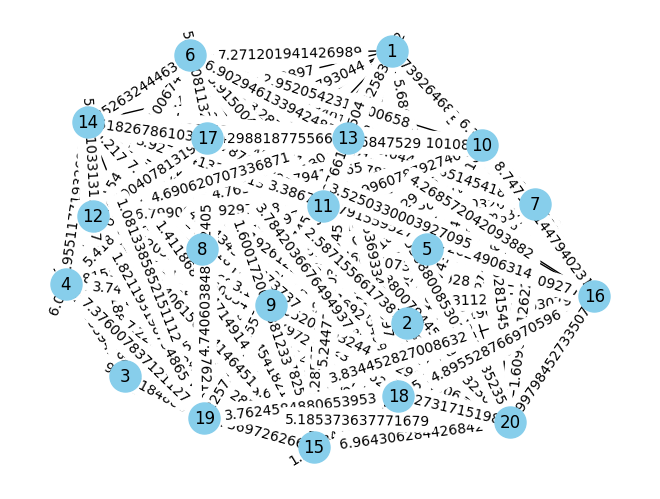

In [41]:
# Visualization
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_size=500, node_color="skyblue")
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.show()

In [42]:
from tqdm import trange
import torch
import torch.optim as optim
import sys
import pickle

args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(
    G2, args["neg_power"])

edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

opt = optim.SGD(line.parameters(), lr=args["lr"],
                    momentum=0.9, nesterov=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}...\n".format(device))
for epoch in range(args["epochs"]):
    print("Epoch {}".format(epoch))
    for b in trange(batchrange):
        samplededges = edgesaliassampler.sample_n(args["batch_size"])
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees,
                                  nodesaliassampler))
        batch = torch.LongTensor(batch)
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]
        line.zero_grad()
        loss = line(v_i, v_j, negsamples, device)
        loss.backward()
        opt.step()

        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

190it [00:00, ?it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 190/190 [00:00<?, ?it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 19/19 [00:00<?, ?it/s]


2/2. Building alias table...
20

Training on cuda:0...

Epoch 0


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 1


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 2


100%|██████████| 19/19 [00:00<00:00, 1187.27it/s]


Epoch 3


100%|██████████| 19/19 [00:00<00:00, 608.03it/s]


Epoch 4


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 5


100%|██████████| 19/19 [00:00<00:00, 737.51it/s]


Epoch 6


100%|██████████| 19/19 [00:00<00:00, 899.36it/s]


Epoch 7


100%|██████████| 19/19 [00:00<00:00, 727.21it/s]


Epoch 8


100%|██████████| 19/19 [00:00<00:00, 1216.09it/s]


Epoch 9


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 10


100%|██████████| 19/19 [00:00<00:00, 1216.19it/s]


Epoch 11


100%|██████████| 19/19 [00:00<00:00, 1187.20it/s]


Epoch 12


100%|██████████| 19/19 [00:00<00:00, 608.04it/s]


Epoch 13


100%|██████████| 19/19 [00:00<00:00, 1198.34it/s]


Epoch 14


100%|██████████| 19/19 [00:00<00:00, 1214.98it/s]


Epoch 15


100%|██████████| 19/19 [00:00<00:00, 1216.19it/s]


Epoch 16


100%|██████████| 19/19 [00:00<00:00, 600.74it/s]


Epoch 17


100%|██████████| 19/19 [00:00<00:00, 1215.93it/s]


Epoch 18


100%|██████████| 19/19 [00:00<00:00, 1216.17it/s]


Epoch 19


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 20


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 21


100%|██████████| 19/19 [00:00<00:00, 821.60it/s]


Epoch 22


100%|██████████| 19/19 [00:00<00:00, 1776.97it/s]


Epoch 23


100%|██████████| 19/19 [00:00<00:00, 1213.57it/s]


Epoch 24


100%|██████████| 19/19 [00:00<00:00, 608.06it/s]


Epoch 25


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 26


100%|██████████| 19/19 [00:00<00:00, 1048.33it/s]


Epoch 27


100%|██████████| 19/19 [00:00<00:00, 1407.24it/s]


Epoch 28


100%|██████████| 19/19 [00:00<00:00, 1215.98it/s]


Epoch 29


100%|██████████| 19/19 [00:00<00:00, 1216.09it/s]


Epoch 30


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 31


100%|██████████| 19/19 [00:00<00:00, 1216.17it/s]


Epoch 32


100%|██████████| 19/19 [00:00<00:00, 600.75it/s]


Epoch 33


100%|██████████| 19/19 [00:00<00:00, 1215.96it/s]


Epoch 34


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 35


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 36


100%|██████████| 19/19 [00:00<00:00, 1216.17it/s]


Epoch 37


100%|██████████| 19/19 [00:00<00:00, 1216.09it/s]


Epoch 38


100%|██████████| 19/19 [00:00<00:00, 1187.20it/s]


Epoch 39


100%|██████████| 19/19 [00:00<00:00, 1216.00it/s]


Epoch 40


100%|██████████| 19/19 [00:00<00:00, 1216.07it/s]


Epoch 41


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 42


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 43


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 44


100%|██████████| 19/19 [00:00<00:00, 921.19it/s]


Epoch 45


100%|██████████| 19/19 [00:00<00:00, 1726.99it/s]


Epoch 46


100%|██████████| 19/19 [00:00<00:00, 1000.36it/s]


Epoch 47


100%|██████████| 19/19 [00:00<00:00, 2302.90it/s]


Epoch 48


100%|██████████| 19/19 [00:00<00:00, 1216.19it/s]


Epoch 49


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 50


100%|██████████| 19/19 [00:00<00:00, 1187.25it/s]


Epoch 51


100%|██████████| 19/19 [00:00<00:00, 1216.00it/s]


Epoch 52


100%|██████████| 19/19 [00:00<00:00, 608.06it/s]


Epoch 53


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 54


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 55


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 56


100%|██████████| 19/19 [00:00<00:00, 1187.23it/s]


Epoch 57


100%|██████████| 19/19 [00:00<00:00, 1215.96it/s]


Epoch 58


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 59


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 60


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 61


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 62


100%|██████████| 19/19 [00:00<00:00, 1187.20it/s]


Epoch 63


100%|██████████| 19/19 [00:00<00:00, 1216.00it/s]


Epoch 64


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 65


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 66


100%|██████████| 19/19 [00:00<00:00, 405.38it/s]


Epoch 67


100%|██████████| 19/19 [00:00<00:00, 9490.51it/s]


Epoch 68


100%|██████████| 19/19 [00:00<00:00, 1356.96it/s]


Epoch 69


100%|██████████| 19/19 [00:00<00:00, 1215.94it/s]


Epoch 70


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 71


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 72


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 73


100%|██████████| 19/19 [00:00<00:00, 1187.23it/s]


Epoch 74


100%|██████████| 19/19 [00:00<00:00, 1215.96it/s]


Epoch 75


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 76


100%|██████████| 19/19 [00:00<00:00, 608.06it/s]


Epoch 77


100%|██████████| 19/19 [00:00<?, ?it/s]


Epoch 78


100%|██████████| 19/19 [00:00<00:00, 1357.01it/s]


Epoch 79


100%|██████████| 19/19 [00:00<00:00, 1216.00it/s]


Epoch 80


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 81


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 82


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 83


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 84


100%|██████████| 19/19 [00:00<00:00, 944.13it/s]


Epoch 85


100%|██████████| 19/19 [00:00<00:00, 1651.92it/s]


Epoch 86


100%|██████████| 19/19 [00:00<00:00, 1215.94it/s]


Epoch 87


100%|██████████| 19/19 [00:00<00:00, 1216.17it/s]


Epoch 88


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 89


100%|██████████| 19/19 [00:00<00:00, 1216.15it/s]


Epoch 90


100%|██████████| 19/19 [00:00<00:00, 1216.09it/s]


Epoch 91


100%|██████████| 19/19 [00:00<00:00, 1187.16it/s]


Epoch 92


100%|██████████| 19/19 [00:00<00:00, 1215.96it/s]


Epoch 93


100%|██████████| 19/19 [00:00<00:00, 1216.17it/s]


Epoch 94


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 95


100%|██████████| 19/19 [00:00<00:00, 1216.13it/s]


Epoch 96


100%|██████████| 19/19 [00:00<00:00, 1216.11it/s]


Epoch 97


100%|██████████| 19/19 [00:00<?, ?it/s]


Epoch 98


100%|██████████| 19/19 [00:00<00:00, 1266.52it/s]


Epoch 99


100%|██████████| 19/19 [00:00<00:00, 1215.96it/s]
